In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import os

## Loading and Processing Data

In [2]:
data_dt = pd.read_excel('output/Results_10CV.xlsx', sheet_name = 'DecisionTreeClassifier')
data_rf = pd.read_excel('output/Results_10CV.xlsx', sheet_name = 'RandomForestClassifier')
data_knn = pd.read_excel('output/Results_10CV.xlsx', sheet_name = 'KNeighborsClassifier')
data_erlc = pd.read_excel('output/Results_10CV.xlsx', sheet_name = 'ERLC')

In [3]:
def get_metric(data_array, metric='Accuracy'):
    models = ['DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'ERLC' ]
    df = pd.DataFrame()
    for i in range(len(data_array)):
        temp = data_array[i]
        temp2 = temp[metric]
        df[models[i]] = temp2
        
    return df

In [4]:
model_names = ['DT', 'RF', 'KNN', 'ERLC']

In [5]:
acc = get_metric([data_dt, data_rf, data_knn, data_erlc])
f1 = get_metric([data_dt, data_rf, data_knn, data_erlc], metric='F1-Score')
mcc = get_metric([data_dt, data_rf, data_knn, data_erlc], metric='MCC')

In [6]:
def getStats(df):
    '''
    Get the mean and standard deviation of columns of a dataframe
    '''
    means = []
    stds = []
    for c in df.columns:
        means.append(df[c].mean())
        stds.append(df[c].std())

    return means,stds

In [7]:
acc_means, acc_stds = getStats(acc)
f1_means, f1_stds = getStats(f1)
mcc_means, mcc_stds = getStats(mcc)

In [8]:
acc_means

[0.9106370491543979,
 0.9238424204730455,
 0.7531163031091221,
 0.9500490945213367]

## Accuracy Animation

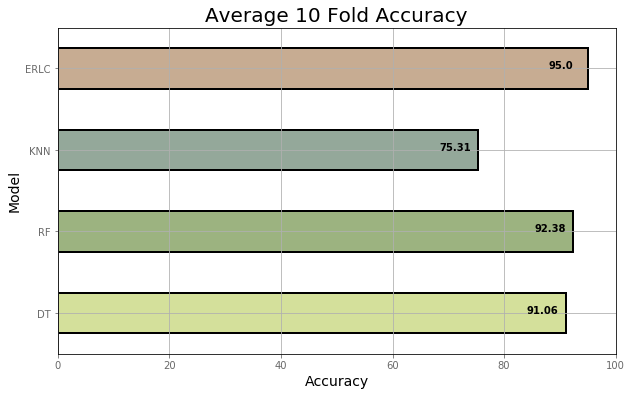

In [84]:
plt.rcParams['animation.ffmpeg_path'] = 'C:\\FFMPEG\\ffmpeg-20200628-4cfcfb3-win64-static\\ffmpeg-20200628-4cfcfb3-win64-static\\bin\\ffmpeg.exe'
n=100 #Number of frames
FFwriter = animation.FFMpegWriter(fps = n)

fig = plt.figure(figsize = (10,6))

position = np.arange(4) + .5 

plt.tick_params(axis = 'x', colors = '#696969')
plt.tick_params(axis = 'y', colors = '#696969')

speeds = [1, 2, 3, 4]
heights = acc_means


rects = plt.barh(position, heights, 0.5,  align = 'center',
                 color = ['#D4E09B', '#9CB380', '#94A89A', '#C7AC92'], 
                 edgecolor = ['#000000'],
                 linewidth = 2)

plt.yticks(position, model_names)

plt.xlabel('Accuracy', color = '#000000', fontsize = 14)
plt.ylabel('Model', color = '#000000', fontsize = 14)
plt.title('Average 10 Fold Accuracy', color = '#000000', fontsize = 20)

# Add text value at end of bar
for i, v in enumerate(heights):
    plt.text(100*v - 7, i + 0.5, str( round(100*v, 2) ), color='black', fontweight='bold')
    
    
plt.xlim((0,100))
plt.ylim((0,4))

plt.grid(True)

rs = [r for r in rects]

def init():
    return rs

def animate(i):
    global rs, heights
    if all(map(lambda x: x==100, heights)):
        heights = [0, 0, 0, 0]
    else:
        heights = [min(h+s,100*acc) for h,s,acc in zip(heights,speeds, acc_means)]
    for h,r in zip(heights,rs):
        r.set_width(h)
    return rs

anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=n,
                             interval=400)

anim.save('output/animations/accuracy_anim.mp4', writer=FFwriter)


plt.show()

## F1 Animation

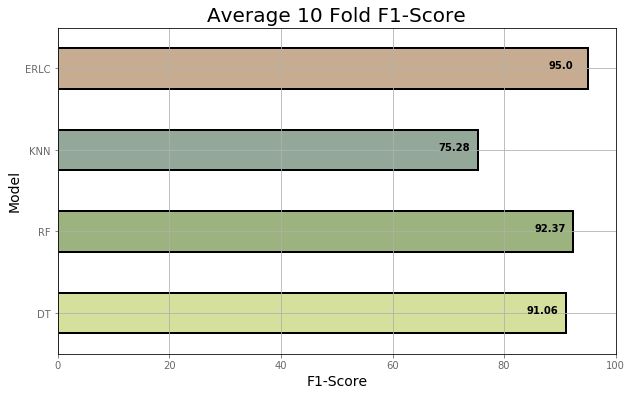

In [87]:
plt.rcParams['animation.ffmpeg_path'] = 'C:\\FFMPEG\\ffmpeg-20200628-4cfcfb3-win64-static\\ffmpeg-20200628-4cfcfb3-win64-static\\bin\\ffmpeg.exe'
n=100 #Number of frames
FFwriter = animation.FFMpegWriter(fps = n)

fig = plt.figure(figsize = (10,6))

position = np.arange(4) + .5 

plt.tick_params(axis = 'x', colors = '#696969')
plt.tick_params(axis = 'y', colors = '#696969')

speeds = [1, 2, 3, 4]
heights = f1_means


rects = plt.barh(position, heights, 0.5,  align = 'center',
                 color = ['#D4E09B', '#9CB380', '#94A89A', '#C7AC92'], 
                 edgecolor = ['#000000'],
                 linewidth = 2)

plt.yticks(position, model_names)

plt.xlabel('F1-Score', color = '#000000', fontsize = 14)
plt.ylabel('Model', color = '#000000', fontsize = 14)
plt.title('Average 10 Fold F1-Score', color = '#000000', fontsize = 20)

# Add text value at end of bar
for i, v in enumerate(heights):
    plt.text(100*v - 7, i + 0.5, str( round(100*v, 2) ), color='black', fontweight='bold')
    
    
plt.xlim((0,100))
plt.ylim((0,4))

plt.grid(True)

rs = [r for r in rects]

def init():
    return rs

def animate(i):
    global rs, heights
    if all(map(lambda x: x==100, heights)):
        heights = [0, 0, 0, 0]
    else:
        heights = [min(h+s,100*f1) for h,s,f1 in zip(heights,speeds, f1_means)]
    for h,r in zip(heights,rs):
        r.set_width(h)
    return rs

anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=n,
                             interval=400)

anim.save('output/animations/f1_anim.mp4', writer=FFwriter)


plt.show()